In [6]:
cd/content/drive/My Drive/투빅스 13기

/content/drive/My Drive/투빅스 13기


In [2]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 37kB/s 
     |████████████████████████████████| 4.3MB 31.8MB/s 
     |████████████████████████████████| 501kB 42.3MB/s 


In [0]:
import pandas as pd
import numpy as np

In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# 간단한 EDA, train data values만 가져옴
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [0]:
# test data
test = test.iloc[:,1:].values

In [0]:
# normalize inputs from 0~255 to 0~1
# 픽셀값이 255이기 때문에 범위를 0~1로 조정하기 위해서는 나눠야함.
X = X / 255
test = test / 255 

In [0]:
# 모듈 불러오기 및 data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1004)

In [13]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


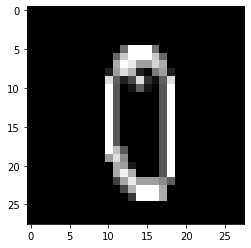

In [14]:
import matplotlib.pyplot as plt
idx = 1000
plt.imshow(X_train[idx].reshape(28,28),cmap="gray") # X_train data의 idx번째 값 이미지보기

In [0]:
def mish(x) :
    return x * tf.nn.tanh( tf.nn.softplus(x)) 

https://data-newbie.tistory.com/297  
 tf.keras.layers.Dense(256,activation=mish(input)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

In [0]:
# tensorflow
import tensorflow as tf
# model 수정
num_calsses = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128,activation="relu",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="relu",bias_initializer=tf.keras.initializers.he_normal(seed=None)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(512,activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512,activation="selu"),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

tf.keras.layers.LeakyReLU(alpha=0.3) 성능이 안좋음

 # Model
 - batch_size가 1이 아닌 것 알기 때문에,그대로 BatchNormalization  
 - weight들끼리의 동조화 현상은 layer를 지날수록 심해질 것으로 예상, Dropout 0.1 ~ 0.4 까지줌 그대로 사용  
 - activation : selu - selu - selu 로 사용, 다중클래스 예측이므로 softmax 사용  
 - relu 이므로 bias_initialization을 he_normal로 해줌  
 - adam,RAdama,adammax,Nadam사용해봄
 - layer 순서 : Dense(input) - BatchNormalization - Dropout - 다시 Dense(activation) ... - 

In [24]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=3e45d7593a586f641f424d9235e8b8afe19d674ff8c04105c438a3004aef00b4
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
model.compile(opimizer=tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
class myAccuracy(tf.keras.metrics.Accuracy):
  def update_state(self,y_true,y_pred,sample_weight=None):
    y_true = tf.argmax(y_true,1)
    y_pred = tf.argmax(y_pred,1)
    return super(myAccuracy,self).update_state(y_true,y_pred,sample_weight)

In [0]:
# 회귀용
# model.compile(optimizer=RAdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=[myAccuracy()])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)              

In [0]:
from keras_radam.training import RAdamOptimizer # 이번에는 Radam
model.compile(optimizer=RAdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)              

In [59]:
history = model.fit(X_train,y_train,batch_size=512,epochs=50,
                    validation_data=[X_test,y_test])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 4s 107us/sample - loss: 0.4856 - accuracy: 0.8566 - val_loss: 0.2629 - val_accuracy: 0.9267
Epoch 2/50
33600/33600 [==============================] - 1s 34us/sample - loss: 0.2132 - accuracy: 0.9385 - val_loss: 0.1684 - val_accuracy: 0.9458
Epoch 3/50
33600/33600 [==============================] - 1s 35us/sample - loss: 0.1638 - accuracy: 0.9524 - val_loss: 0.1130 - val_accuracy: 0.9644
Epoch 4/50
33600/33600 [==============================] - 1s 34us/sample - loss: 0.1348 - accuracy: 0.9598 - val_loss: 0.1998 - val_accuracy: 0.9433
Epoch 5/50
33600/33600 [==============================] - 1s 33us/sample - loss: 0.1197 - accuracy: 0.9654 - val_loss: 0.0987 - val_accuracy: 0.9729
Epoch 6/50
33600/33600 [==============================] - 1s 34us/sample - loss: 0.0996 - accuracy: 0.9707 - val_loss: 0.0953 - val_accuracy: 0.9750
Epoch 7/50
33600/33600 [==============================] 

In [0]:
# pip install keras-rectified-adam # optimize

In [0]:
predictions = model.predict_classes(test)

In [63]:
sample_submission["Category"]=pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("relu_selu_nadam_submission.csv",index=False)

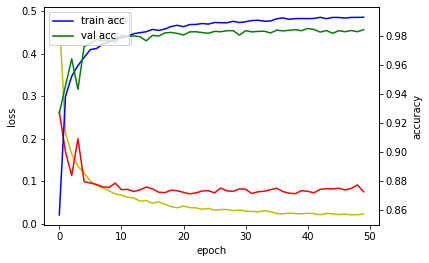

In [60]:
# visualization
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [61]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest cost:", score[0])
print('Test accuracy:', score[1])

8400/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

epoch를 20으로 하나 50으로 하나 별다를바 없음을 알 수 있음

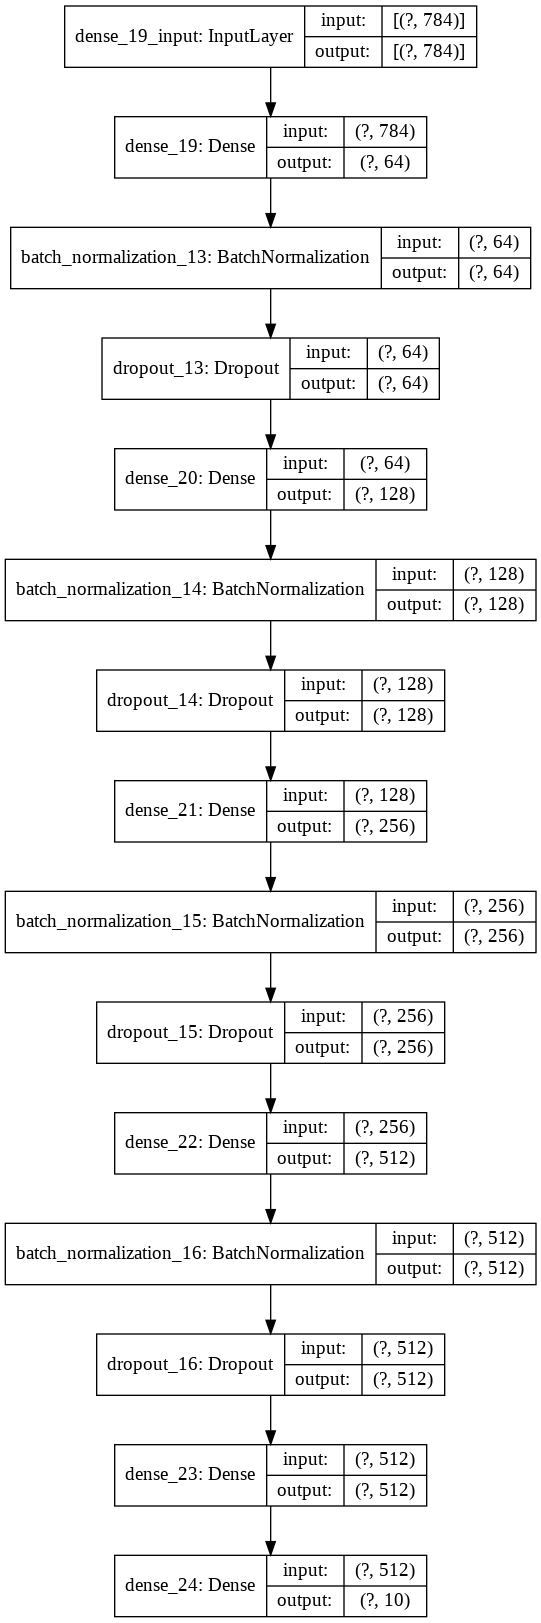

In [52]:
# model layer 시각화
tf.keras.utils.plot_model(model, '*.png', show_shapes = True)

https://www.tensorflow.org/guide/keras/overview?hl=ko